<a href="https://colab.research.google.com/github/viki6666/Pytorch_learn/blob/master/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
 
# 假数据
n_data = torch.ones(100, 2)         # 数据的基本形态
x0 = torch.normal(2*n_data, 1)      # 类型0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # 类型0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # 类型1 x data (tensor), shape=(100, 1)
y1 = torch.ones(100)                # 类型1 y data (tensor), shape=(100, 1)
 
# 注意 x, y 数据的数据形式是一定要像下面一样 (torch.cat 是在合并数据)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # FloatTensor = 32-bit floating
y = torch.cat((y0, y1), 0).type(torch.FloatTensor)    # LongTensor = 64-bit integer
 
# 画图
# plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
# plt.show()
 
class LogisticRegression(nn.Module):#构造模型
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.lr = nn.Linear(2, 1)
        self.sm = nn.Sigmoid()
 
    def forward(self, x):#将模型链接起来
        x = self.lr(x)
        x = self.sm(x)
        return x
 
logistic_model = LogisticRegression()
if torch.cuda.is_available():
    logistic_model.cuda()
 
# 定义损失函数和优化器
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(logistic_model.parameters(), lr=1e-3, momentum=0.9)
 
# 开始训练
for epoch in range(10000):
    if torch.cuda.is_available():
        x_data = Variable(x).cuda()
        y_data = Variable(y).cuda()
    else:
        x_data = Variable(x)#为求导做准备
        y_data = Variable(y)
 
    out = logistic_model(x_data)#模型
    loss = criterion(out, y_data)#策略：损失函数
    print_loss = loss.data.item()
    mask = out.ge(0.5).float()  # 以0.5为阈值进行分类，ge(a,b) 相当于 a >= b
    correct = (mask == y_data).sum()  # 计算正确预测的样本个数
    acc = correct.item() / x_data.size(0)  # 计算精度
    optimizer.zero_grad()#梯度清零
    loss.backward()#反向传播
    optimizer.step()
    # 每隔20轮打印一下当前的误差和精度
    if (epoch + 1) % 20 == 0:
        print('*'*10)
        print('epoch {}'.format(epoch+1)) # 训练轮数
        print('loss is {:.4f}'.format(print_loss))  # 误差
        print('acc is {:.4f}'.format(acc))  # 精度
 
# 结果可视化
w0, w1 = logistic_model.lr.weight[0]
w0 = float(w0.item())
w1 = float(w1.item())
b = float(logistic_model.lr.bias.item())
plot_x = np.arange(-7, 7, 0.1)
plot_y = (-w0 * plot_x - b) / w1
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.plot(plot_x, plot_y)
plt.show()

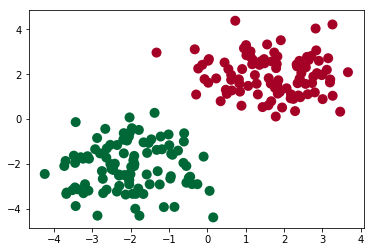

In [3]:
# 假数据
n_data = torch.ones(100, 2)         # 数据的基本形态
x0 = torch.normal(2*n_data, 1)      # 类型0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # 类型0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # 类型1 x data (tensor), shape=(100, 1)
y1 = torch.ones(100)                # 类型1 y data (tensor), shape=(100, 1)
 
# 注意 x, y 数据的数据形式是一定要像下面一样 (torch.cat 是在合并数据)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # FloatTensor = 32-bit floating
y = torch.cat((y0, y1), 0).type(torch.FloatTensor)    # LongTensor = 64-bit integer
 
# 画图
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [0]:
class LogisticRegression(nn.Module):#构造模型
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.lr = nn.Linear(2, 1)
        self.sm = nn.Sigmoid()
 
    def forward(self, x):#将模型链接起来
        x = self.lr(x)
        x = self.sm(x)
        return x

In [8]:
 LogisticRegression()#显示模型

LogisticRegression(
  (lr): Linear(in_features=2, out_features=1, bias=True)
  (sm): Sigmoid()
)

In [15]:
type(logistic_model.parameters())#想查看里面是什么？

generator

In [19]:
for param in logistic_model.parameters():
    print(type(param.data), param.size())
    print(param.data)

<class 'torch.Tensor'> torch.Size([1, 2])
tensor([[-2.2868, -1.7957]])
<class 'torch.Tensor'> torch.Size([1])
tensor([-0.0082])


In [0]:
w0, w1 = logistic_model.lr.weight[0]

In [21]:
w0

tensor(-2.2868, grad_fn=<SelectBackward>)